##**Asssignment1-PART-B -LSTM for Text Classification**

### **1. Getting the Dataset**


In [1]:
import keras

imdb = keras.datasets.imdb

In [2]:
%%capture

# we'll use the most frequent 10000 words in the vocabulary
VOCAB_SIZE = 10000

# 0 is reserved for ‘<PAD>’, 1 for ‘<START>’ and 2 for ‘<UNK>’ i.e. words not in vocabulary
# the documentation says index_from = 3 but actually uses the value as an offset. The words
# in the dictionary are indexed from 1 by default so, saying index_from=3 means any actual
# words would start from 4 (1+3) and index 3 will be left unused. We use index_from=offset=2 to avoid this
# If you want to explore this further, you may look up the source_code for load_data here
#https://github.com/tensorflow/tensorflow/blob/v2.4.1/tensorflow/python/keras/datasets/imdb.py#L31-L162
OFFSET = 2

word = imdb.get_word_index()
word = {k:(v+3) for k,v in word.items()}
word["<PAD>"] = 0
word["<START>"] = 1
word["<UNK>"] = 2  
word["<UNUSED>"] = 3

# for more information on the load_data method, type(help(load_data))
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE, index_from=OFFSET)

***Sanity Check***

In [3]:
print('Sample review:', train_data[0])

Sample review: [1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]


In [4]:
print('\n Sample label:', train_labels[0])


 Sample label: 1


### **2. Readying the Inputs for the LSTM**

In [5]:
from keras.preprocessing.sequence import pad_sequences
MAX_LENGHT = 500

# YOUR CODE GOES HERE
#padding the train and test sequence 
#we use pre padding since it is denoted as the best in the description
padded_train_data = pad_sequences(train_data, padding='pre', value=word["<PAD>"], maxlen=MAX_LENGHT)
padded_test_data = pad_sequences(test_data, padding='pre', value=word["<PAD>"], maxlen=MAX_LENGHT)

***Sanity Check***

In [6]:
print('Length of sample train_data before preprocessing:', len(train_data[0]))
print('Length of sample train_data after preprocessing:', len(padded_train_data[0]))
print('Sample train data:', padded_train_data[0])

Length of sample train_data before preprocessing: 218
Length of sample train_data after preprocessing: 500
Sample train data: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  

### **3. Building the Model**

In [7]:
from keras.layers import Input, Embedding, Dense, LSTM
from keras.models import Model

EMBED_SIZE = 100

# YOUR CODE GOES HERE
LSTM_units = 100

#first layer --> input layer
inputlayer = Input(shape=MAX_LENGHT, dtype='int32')
#second layer --> embedding layer
embed = Embedding(input_dim=VOCAB_SIZE, input_length=MAX_LENGHT, output_dim=EMBED_SIZE, mask_zero=True)(inputlayer)
#third layer --> lstm layer
lstm = LSTM((LSTM_units), return_sequences=False)(embed)
#fourth layer --> dense layer which is otherwise known as output layer
output = Dense(1, activation='sigmoid')(lstm)
#forming a CNN model
model = Model(inputlayer, output)

#compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

***Sanity Check***

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


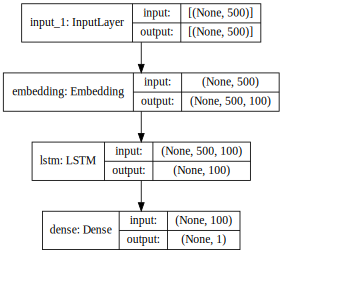

In [ ]:
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))

### **4. Training the Model**


**Step 1: Getting a validation dataset**

In [5]:
from sklearn.model_selection import train_test_split

train_x, validation_x, train_y, validation_y = train_test_split(padded_train_data, train_labels, test_size=0.08) 

**Step 2: Training the model**

In [ ]:
history = model.fit(train_x, train_y, epochs=6, batch_size=1000, validation_data=(validation_x, validation_y))

Epoch 1/6
23/23 [==============================] - 165s 7s/step - loss: 0.6787 - accuracy: 0.5986 - val_loss: 0.6270 - val_accuracy: 0.6605
Epoch 2/6
23/23 [==============================] - 156s 7s/step - loss: 0.6096 - accuracy: 0.6933 - val_loss: 0.4580 - val_accuracy: 0.8230
Epoch 3/6
23/23 [==============================] - 153s 7s/step - loss: 0.4034 - accuracy: 0.8456 - val_loss: 0.3310 - val_accuracy: 0.8635
Epoch 4/6
23/23 [==============================] - 154s 7s/step - loss: 0.2689 - accuracy: 0.8960 - val_loss: 0.2842 - val_accuracy: 0.8860
Epoch 5/6
23/23 [==============================] - 154s 7s/step - loss: 0.2005 - accuracy: 0.9296 - val_loss: 0.2660 - val_accuracy: 0.8965
Epoch 6/6
23/23 [==============================] - 154s 7s/step - loss: 0.1576 - accuracy: 0.9481 - val_loss: 0.3109 - val_accuracy: 0.8865


**Step 3: Visualize the model plot**

In [ ]:
pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.27-cp36-none-any.whl size=7333 sha256=5c1a19d6b23b0deb6fb8a166d3063fdbc0b09c1ed86c6bfb9a6d9255e1bc9298
  Stored in directory: /root/.cache/pip/wheels/38/9e/e3/6cde1b6b6141b044c692d88980f26c4fe7806cc92ddd009c8c
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.24-cp36-none-any.whl size=7000 sha256=bdb021089c773a2930333591197e738262e03d5afe2a67a63d45268a81f52e7d
  Stored in directory: /root/.cache/pip/wheels/0c/3b/5d/f2fb3eff7f2fe268463b91a825816a07cd8458c4fe359f034a
  Created wheel for compress-json: filename=compress_json-1.0.4-cp36-none-any.whl size=4585 sha256=66f062908157cd625522f4d929abc53df16da88c9afdb70e9172ab8db642c61e
  Stored in directory: /root/.cache/pip/wheels/83/ec/21/51460dd508e4a152c0643946c21fae84eb3391171164d35745
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [ ]:
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

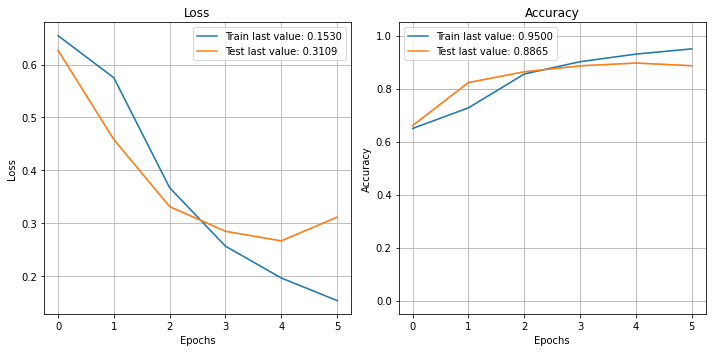

In [ ]:
plot_history(history.history, path="standard.png")
plt.show()

**Based on the accuracy plot, what do you think the optimal stopping point for your model should
have been?**

**Answer:**

Optimal Stopping point for the model for train and test data is between **0.8-1.0 in epoch 4**.


### **5. Evaluating the Model on the Test Data**

In [ ]:
# YOUR CODE TO EVALUATE THE MODEL ON TEST DATA GOES HERE
results = model.evaluate(padded_test_data, test_labels)

print('test_loss:', results[0], 'test_accuracy:', results[1])

782/782 [==============================] - 77s 97ms/step - loss: 0.3514 - accuracy: 0.8720
test_loss: 0.35144007205963135 test_accuracy: 0.8720399737358093


###**6. Extracting the Word Embeddings**

In [ ]:
# YOUR CODE GOES HERE
#extract the word embeddings from the embedding layer
word_embeddings = model.get_layer('embedding').get_weights()[0]

***Sanity Check***

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print('Shape of word_embeddings:', word_embeddings.shape)

Shape of word_embeddings: (10000, 100)


###**7. Visualizing the Reviews**

**Step 1: Create a word2idx dictionary**

In [ ]:
# in this dictionary, the words start from 1, 0 is reserved for padding but 
# <start> and <unknown> are not accounted for.
word_indices = imdb.get_word_index()

# so we shift each original word two places to make room for the two new tokens
offset = 2
word2idx = {k:(v+offset) for k,v in word_indices.items() if v < 9998}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2


**Step 2: Create a the idx2word dictionary**

In [ ]:
# YOUR CODE GOES HERE
idx2word = {}
for K,V in word2idx.items():
  idx2word[V] = K


**Step 3: Visualize sample review**

In [ ]:
print(' '.join(idx2word[idx] for idx in train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

###**8. Visualizing the Word_Embeddings**

In [ ]:
# YOUR CODE GOES HERE
#use pandas to get the word embedding in dataframe format with both its word and index
from pandas import DataFrame
print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

                 0         1         2   ...        97        98        99
woods     -0.017684 -0.030449  0.000596  ...  0.045216 -0.013959  0.009986
hanging    0.011693 -0.027184  0.018003  ... -0.002152 -0.040457  0.030017
woody     -0.002048 -0.005713  0.046993  ... -0.046072  0.027506 -0.051886
arranged  -0.015174 -0.030467  0.027227  ...  0.022546 -0.024800  0.001620
bringing   0.054839  0.051300  0.034480  ... -0.017563 -0.008541 -0.001397
wooden    -0.026458 -0.022431  0.037432  ... -0.011086 -0.034329 -0.005093
errors    -0.004215  0.027285  0.016057  ... -0.002561  0.031711  0.023295
dialogs    0.022387 -0.035350 -0.002689  ... -0.044630  0.012733 -0.036913
kids      -0.023671 -0.022799 -0.023656  ...  0.018535  0.006677  0.009798
uplifting -0.056749  0.040830 -0.007067  ... -0.055314  0.046078  0.044464

[10 rows x 100 columns]


###**9. Plot your Word Embeddings using t-SNE**


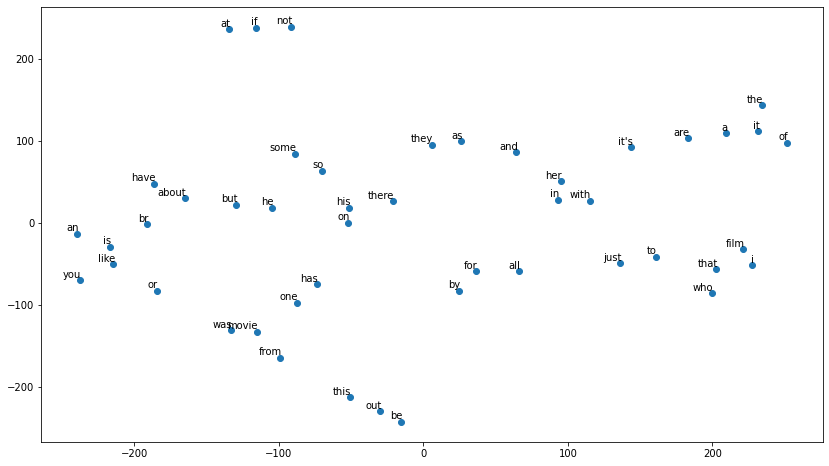

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
plot_only = 50

# don't plot the special tokens
start = 3
T = tsne.fit_transform(word_embeddings[start:plot_only, :])
labels = [idx2word[i] for i in range(start, plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')                      	                        


###**10. Questions**

**1. Create a new model that is a copy of the model step 3. To this new model,add two dropout layers, one between the embedding layer and the LSTM layer and another between the LSTM layer and the output layer. Repeat steps 4 and 5 for this model. What do you observe?**


In [ ]:
from keras.layers import Dropout

# Create LSTM based model
EMBED_SIZE = 100

# YOUR CODE GOES HERE
LSTM_units = 100

#first layer --> input layer
inputlayer = Input(shape=MAX_LENGHT, dtype='int32')
#second layer --> embedding layer
embed = Embedding(input_dim=VOCAB_SIZE, input_length=MAX_LENGHT, output_dim=EMBED_SIZE, mask_zero=True)(inputlayer)
#third layer --> first dropout layer
dropout1 = Dropout(0.8)(embed)
#fourth layer --> lstm layer
lstm = LSTM((LSTM_units), return_sequences=False)(dropout1)
#fifth layer --> second dropout layer
dropout2 = Dropout(0.8)(lstm)
#sixth layer --> dense layer which is otherwise known as output layer
output = Dense(1, activation='sigmoid')(dropout2)
#combining to form a CNN model
newmodel = Model(inputlayer, output)

#compiling the model
newmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
newmodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________

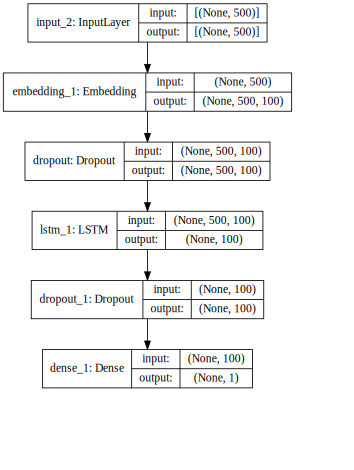

In [ ]:
SVG(vis_utils.model_to_dot(newmodel, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg')) 

In [ ]:
history2 = newmodel.fit(train_x, train_y, epochs=6, batch_size=1000, validation_data=(validation_x, validation_y))

Epoch 1/6
23/23 [==============================] - 165s 7s/step - loss: 0.6923 - accuracy: 0.5182 - val_loss: 0.6801 - val_accuracy: 0.6900
Epoch 2/6
23/23 [==============================] - 162s 7s/step - loss: 0.6365 - accuracy: 0.6705 - val_loss: 0.5015 - val_accuracy: 0.8330
Epoch 3/6
23/23 [==============================] - 162s 7s/step - loss: 0.4479 - accuracy: 0.8230 - val_loss: 0.3133 - val_accuracy: 0.8700
Epoch 4/6
23/23 [==============================] - 162s 7s/step - loss: 0.3180 - accuracy: 0.8753 - val_loss: 0.2744 - val_accuracy: 0.8880
Epoch 5/6
23/23 [==============================] - 162s 7s/step - loss: 0.2682 - accuracy: 0.8976 - val_loss: 0.2566 - val_accuracy: 0.8935
Epoch 6/6
23/23 [==============================] - 159s 7s/step - loss: 0.2306 - accuracy: 0.9164 - val_loss: 0.2699 - val_accuracy: 0.8940


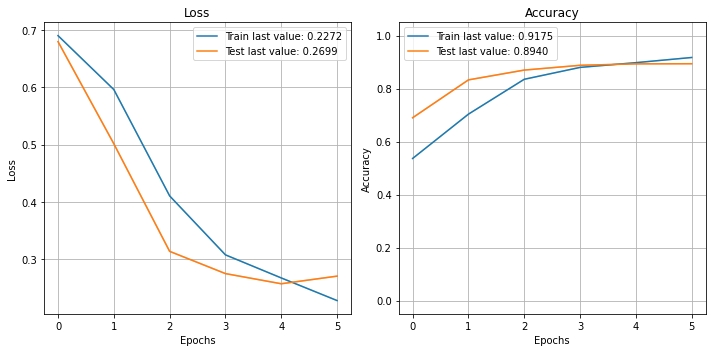

In [ ]:
plot_history(history2.history, path="standard.png")
plt.show()

In [ ]:
results2 = newmodel.evaluate(padded_test_data, test_labels)
print('test_loss:', results2[0], 'test_accuracy:', results2[1])

782/782 [==============================] - 77s 97ms/step - loss: 0.3121 - accuracy: 0.8808
test_loss: 0.3121439516544342 test_accuracy: 0.8807600140571594


**2. Experiment with training the model with batch sizes of 1, 32, len(training_data). What do you observe?**

#**For Batchsize = 1**

In [ ]:
#For batch_size = 1
history2s1 = newmodel.fit(train_x, train_y, epochs=3, batch_size=1, validation_data=(validation_x, validation_y))

Epoch 1/3
23000/23000 [==============================] - 4139s 180ms/step - loss: 0.5195 - accuracy: 0.7552 - val_loss: 0.3054 - val_accuracy: 0.8715
Epoch 2/3
23000/23000 [==============================] - 4138s 180ms/step - loss: 0.3028 - accuracy: 0.8843 - val_loss: 0.2939 - val_accuracy: 0.8825
Epoch 3/3
23000/23000 [==============================] - 4135s 180ms/step - loss: 0.2457 - accuracy: 0.9101 - val_loss: 0.3068 - val_accuracy: 0.8930


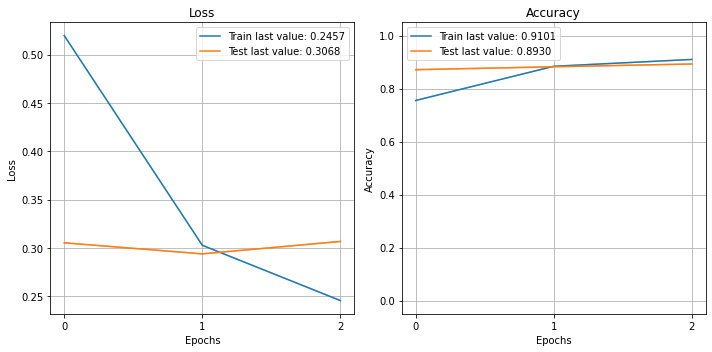

In [ ]:
plot_history(history2s1.history, path="standard.png")
plt.show()

#**For Batchsize = 32**

In [ ]:
#For batch_size = 32
history2s32 = newmodel.fit(train_x, train_y, epochs=3, batch_size=32, validation_data=(validation_x, validation_y))

Epoch 1/3
719/719 [==============================] - 356s 495ms/step - loss: 0.1692 - accuracy: 0.9393 - val_loss: 0.2651 - val_accuracy: 0.9045
Epoch 2/3
719/719 [==============================] - 355s 494ms/step - loss: 0.1576 - accuracy: 0.9433 - val_loss: 0.2593 - val_accuracy: 0.9065
Epoch 3/3
719/719 [==============================] - 353s 491ms/step - loss: 0.1512 - accuracy: 0.9461 - val_loss: 0.2554 - val_accuracy: 0.9030


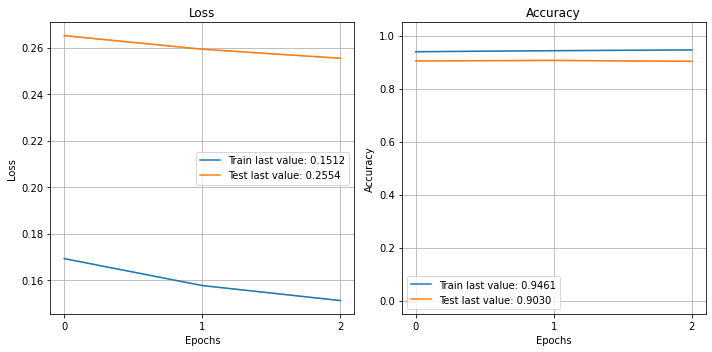

In [ ]:
plot_history(history2s32.history, path="standard.png")
plt.show()

#**For Batchsize = len(training_data)**

In [ ]:
len(train_data)

25000

In [10]:
len(train_x)
len(train_y)

23000

In [ ]:
#For batch_size = len(training_data)
history2slen = newmodel.fit(train_x, train_y, epochs=3 , batch_size=len(train_x),validation_data=(validation_x, validation_y))
plot_history(history2slen.history, path="standard.png")
plt.show()

**INFERENCE:**
* since, the length of the train_data is 23000 
* It takes much longer to execute, in that time my kernal gets crashed
* I tried running this code cell for several times and it results the same. 
* so that, this code cell for batch size = len(training_data) cannot be executed
* Theoretically with this as batch size, We will get the best accuracy.
* But the above all model are Overfitting.


**3. (optional) Can you retrain with a Bidirectional LSTM instead of an LSTM? What do you observe about the Bi-LSTM model?**

In [ ]:
from keras.layers import Bidirectional
from tensorflow.keras import layers

#**Implementing Bidirectional LSTM Without Dropout**

In [ ]:
EMBED_SIZE = 100

# YOUR CODE GOES HERE
LSTM_units = 100

#first layer --> input layer
inputlayer = Input(shape=MAX_LENGHT, dtype='int32')
#second layer --> embedding layer
embed = Embedding(input_dim=VOCAB_SIZE, input_length=MAX_LENGHT, output_dim=EMBED_SIZE, mask_zero=True)(inputlayer)
#third layer --> bidirectional lstm layer
lstm = Bidirectional(LSTM((LSTM_units), return_sequences=False))(embed)
#fourth layer --> dense layer
output = Dense(1, activation='sigmoid')(lstm)
#forming a CNN model
newmodel2 = Model(inputlayer, output)

#compile the model
newmodel2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
newmodel2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 1,161,001
Trainable params: 1,161,001
Non-trainable params: 0
_________________________________________________________________


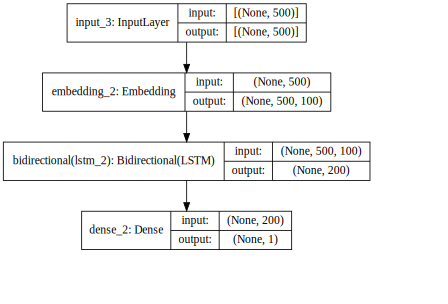

In [ ]:
SVG(vis_utils.model_to_dot(newmodel2, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg')) 

In [ ]:
history3 = newmodel2.fit(train_x, train_y, epochs=6, batch_size=1000, validation_data=(validation_x, validation_y))

Epoch 1/6
23/23 [==============================] - 320s 14s/step - loss: 0.6807 - accuracy: 0.5602 - val_loss: 0.5779 - val_accuracy: 0.7075
Epoch 2/6
23/23 [==============================] - 304s 13s/step - loss: 0.5019 - accuracy: 0.7760 - val_loss: 0.3830 - val_accuracy: 0.8025
Epoch 3/6
23/23 [==============================] - 298s 13s/step - loss: 0.3113 - accuracy: 0.8707 - val_loss: 0.3129 - val_accuracy: 0.8590
Epoch 4/6
23/23 [==============================] - 301s 13s/step - loss: 0.2548 - accuracy: 0.9024 - val_loss: 0.3404 - val_accuracy: 0.8650
Epoch 5/6
23/23 [==============================] - 299s 13s/step - loss: 0.2149 - accuracy: 0.9186 - val_loss: 0.2625 - val_accuracy: 0.8935
Epoch 6/6
23/23 [==============================] - 297s 13s/step - loss: 0.1794 - accuracy: 0.9381 - val_loss: 0.2887 - val_accuracy: 0.8895


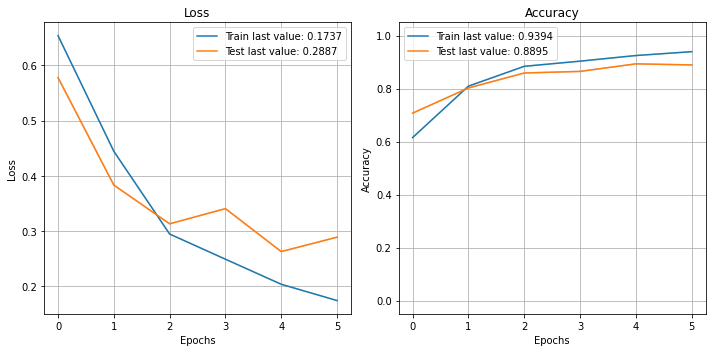

In [ ]:
plot_history(history3.history, path="standard.png")
plt.show()

In [ ]:
results3 = newmodel2.evaluate(padded_test_data, test_labels)
print('test_loss:', results2[0], 'test_accuracy:', results2[1])

782/782 [==============================] - 134s 169ms/step - loss: 0.3394 - accuracy: 0.8702
test_loss: 0.3121439516544342 test_accuracy: 0.8807600140571594


#**Implementing Bidirectional LSTM With Dropout**

In [ ]:
#Create Bi-LSTM based model
EMBED_SIZE = 100

# YOUR CODE GOES HERE
LSTM_units = 100

#first layer --> input layer
inputlayer = Input(shape=MAX_LENGHT, dtype='int32')
#second layer --> embedding layer
embed = Embedding(input_dim=VOCAB_SIZE, input_length=MAX_LENGHT, output_dim=EMBED_SIZE, mask_zero=True)(inputlayer)
#third layer --> first dropout layer
dropout1 = Dropout(0.8)(embed)
#fourth layer --> bidirectional lstm layer
lstm = Bidirectional(LSTM((LSTM_units), return_sequences=False))(dropout1)
#fifth layer --> second dropout layer
dropout2 = Dropout(0.8)(lstm)
#sixth layer --> dense layer
output = Dense(1, activation='sigmoid')(dropout2)
#combining to form a CNN model
newmodel3 = Model(inputlayer, output)

#compile
newmodel3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
newmodel3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 1,161,001
Trainable params: 1,161,001
Non-trainable params: 0
_________________________________________________

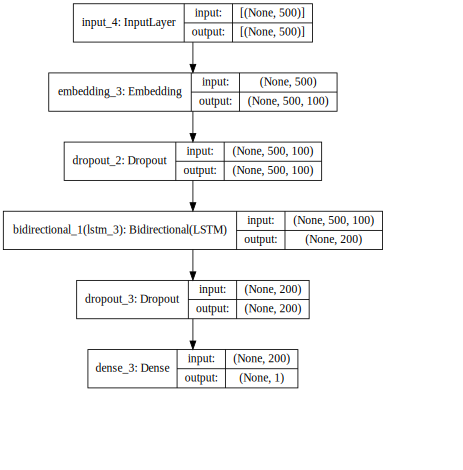

In [ ]:
SVG(vis_utils.model_to_dot(newmodel3, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg')) 

In [ ]:
history4 = newmodel3.fit(train_x, train_y, epochs=6, batch_size=1000, validation_data=(validation_x, validation_y))

Epoch 1/6
23/23 [==============================] - 312s 13s/step - loss: 0.6929 - accuracy: 0.5066 - val_loss: 0.6830 - val_accuracy: 0.6955
Epoch 2/6
23/23 [==============================] - 302s 13s/step - loss: 0.6293 - accuracy: 0.6704 - val_loss: 0.4982 - val_accuracy: 0.7485
Epoch 3/6
23/23 [==============================] - 300s 13s/step - loss: 0.4491 - accuracy: 0.7892 - val_loss: 0.3064 - val_accuracy: 0.8740
Epoch 4/6
23/23 [==============================] - 301s 13s/step - loss: 0.3066 - accuracy: 0.8790 - val_loss: 0.2669 - val_accuracy: 0.8955
Epoch 5/6
23/23 [==============================] - 303s 13s/step - loss: 0.2636 - accuracy: 0.8995 - val_loss: 0.2799 - val_accuracy: 0.8830
Epoch 6/6
23/23 [==============================] - 303s 13s/step - loss: 0.2372 - accuracy: 0.9108 - val_loss: 0.2555 - val_accuracy: 0.8945


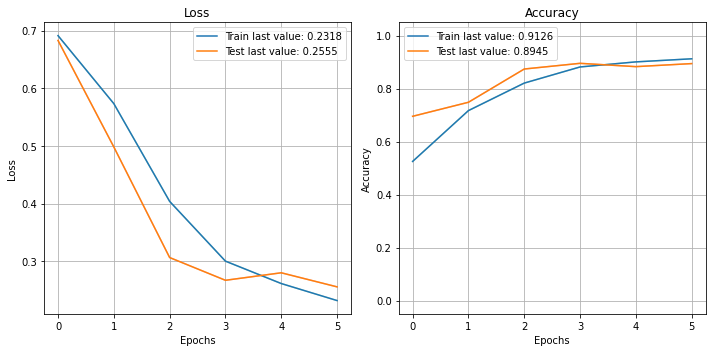

In [ ]:
plot_history(history4.history, path="standard.png")
plt.show()

In [ ]:
results4 = newmodel3.evaluate(padded_test_data, test_labels)
print('test_loss:', results2[0], 'test_accuracy:', results2[1])

782/782 [==============================] - 134s 169ms/step - loss: 0.2871 - accuracy: 0.8829
test_loss: 0.3121439516544342 test_accuracy: 0.8807600140571594


*	Bidirectional LSTM increases Accuracy and decreases the loss as compared to LSTM.